In [2]:
# K-means clustering k =2 

import numpy as np
from sklearn.cluster import KMeans

# Data points: Houses (size in sq ft, price in dollars)
data = np.array([
    [1500, 300000],
    [2000, 400000],
    [2500, 500000]
])

# Apply KMeans clustering with 2 clusters
kmeans = KMeans(n_clusters=2, init="k-means++", n_init=10, random_state=42)
kmeans.fit(data)

# Output results
inertia_custom = kmeans.inertia_
labels_custom = kmeans.labels_
centroids = kmeans.cluster_centers_

print("Cluster Assignments:", labels_custom)
print("Centroids:", centroids)
print("Inertia:", inertia_custom)

Cluster Assignments: [0 0 1]
Centroids: [[  1750. 350000.]
 [  2500. 500000.]]
Inertia: 5000125000.0


C:\Users\yut3\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [6]:
# K-means clustering k =1 

import numpy as np
from sklearn.cluster import KMeans

# Data points: Houses (size in sq ft, price in dollars)
data = np.array([
    [1500, 300000],
    [2000, 400000],
    [2500, 500000]
])

# Apply KMeans clustering with 2 clusters
kmeans = KMeans(n_clusters=1, init="k-means++", n_init=10, random_state=42)
kmeans.fit(data)

# Output results
inertia_custom = kmeans.inertia_
labels_custom = kmeans.labels_
centroids = kmeans.cluster_centers_

print("Cluster Assignments:", labels_custom)
print("Centroids:", centroids)
print("Inertia:", inertia_custom)

Cluster Assignments: [0 0 0]
Centroids: [[  2000. 400000.]]
Inertia: 20000500000.0


C:\Users\yut3\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [7]:
# K-means clustering k =3 

import numpy as np
from sklearn.cluster import KMeans

# Data points: Houses (size in sq ft, price in dollars)
data = np.array([
    [1500, 300000],
    [2000, 400000],
    [2500, 500000]
])

# Apply KMeans clustering with 2 clusters
kmeans = KMeans(n_clusters=3, init="k-means++", n_init=10, random_state=42)
kmeans.fit(data)

# Output results
inertia_custom = kmeans.inertia_
labels_custom = kmeans.labels_
centroids = kmeans.cluster_centers_

print("Cluster Assignments:", labels_custom)
print("Centroids:", centroids)
print("Inertia:", inertia_custom)

Cluster Assignments: [2 0 1]
Centroids: [[  2000. 400000.]
 [  2500. 500000.]
 [  1500. 300000.]]
Inertia: 0.0


C:\Users\yut3\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [8]:
# PCA

import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Simulate data
np.random.seed(42)  # For reproducibility
data = pd.DataFrame({
    "Firm Size": np.random.normal(500, 100, 100),   # firm size
    "Leverage": np.random.normal(1.5, 0.5, 100),   # Debt-to-equity ratio
    "Profitability": np.random.normal(10, 2, 100), # Return on assets (ROA)
    "Market-to-Book": np.random.normal(3, 0.8, 100) # BM ratio
})

# Step 2: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Step 3: Apply PCA
pca = PCA(n_components=2) 
principal_components = pca.fit_transform(scaled_data)

# Step 4: Results
explained_variance = pca.explained_variance_ratio_
principal_df = pd.DataFrame(principal_components, columns=["PC1", "PC2"])

print("Explained Variance Ratio:")
print(explained_variance)
print("\nFirst 5 rows of Principal Components:")
print(principal_df.head())

# Save principal components to a CSV file
principal_df.to_csv("principal_components.csv", index=False)
print("\nPrincipal components saved to 'principal_components.csv'")

Explained Variance Ratio:
[0.32430538 0.25675557]

First 5 rows of Principal Components:
        PC1       PC2
0 -1.542507  0.053359
1 -0.653925 -0.195025
2 -0.906593  0.993512
3 -1.801100  1.071565
4  0.634357 -0.375091

Principal components saved to 'principal_components.csv'


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


C:\Users\yut3\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


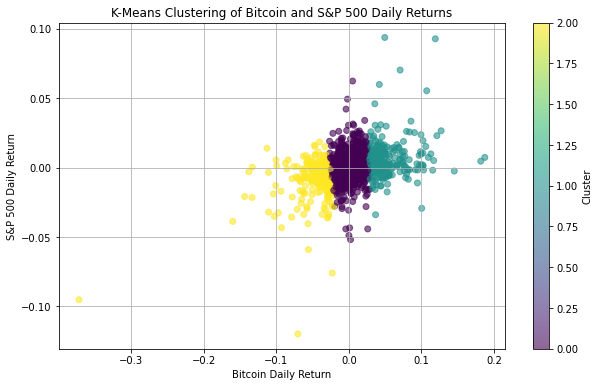

In [9]:
import pandas as pd
import yfinance as yf
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from datetime import datetime

# Define the time period for analysis
start_date = '2020-01-01'
end_date = datetime.today().strftime('%Y-%m-%d')

# Fetch historical data for Bitcoin and S&P 500
btc = yf.download('BTC-USD', start=start_date, end=end_date)
sp500 = yf.download('^GSPC', start=start_date, end=end_date)

# Calculate daily returns
btc['Return'] = btc['Adj Close'].pct_change()
sp500['Return'] = sp500['Adj Close'].pct_change()
# Combine the returns into a single DataFrame
returns = pd.DataFrame({
    'BTC_Return': btc['Return'],
    'SP500_Return': sp500['Return']
}).dropna()

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
returns['Cluster'] = kmeans.fit_predict(returns)

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(returns['BTC_Return'], returns['SP500_Return'], c=returns['Cluster'], cmap='viridis', alpha=0.6)
plt.xlabel('Bitcoin Daily Return')
plt.ylabel('S&P 500 Daily Return')
plt.title('K-Means Clustering of Bitcoin and S&P 500 Daily Returns')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()
